<a href="https://colab.research.google.com/github/douglassesi/Python/blob/master/Exerciocio_1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8'
)

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,brinquedo
freq,20,39,1020


In [2]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [3]:
df.isnull().sum()

nome            0
descricao    1164
categoria       0
dtype: int64

In [4]:
df.isnull().sum()/df.shape[0]

nome         0.000000
descricao    0.285294
categoria    0.000000
dtype: float64

In [5]:
df.isnull().sum()

nome            0
descricao    1164
categoria       0
dtype: int64

In [0]:
df.dropna(inplace=True)

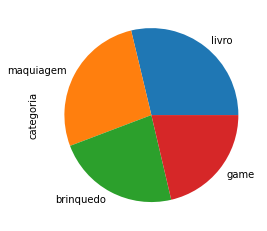

In [7]:
df.categoria.value_counts().plot.pie()

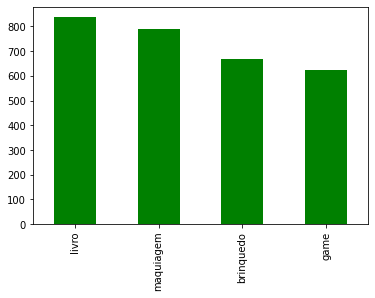

In [8]:
df.categoria.value_counts().plot(kind='bar', color='green')

In [0]:
#from collections import Counter
#counter = Counter()
#counter['a'] += 2
#counter['b'] += 2
#counter


In [0]:
from collections import Counter # implementa um container de tipo de dados. Ex: dict, list, set, and tuple

c_desc = Counter() # subclasse dict para contar objetos de Descricao
#c_cat = Counter() # subclasse dict para contar objetos de Descricao

In [10]:
df.descricao.str.lower().str.split().apply(c_desc.update)
c_desc.most_common(10)

[('de', 23840),
 ('e', 15795),
 ('o', 12266),
 ('a', 11917),
 ('do', 8657),
 ('para', 7928),
 ('em', 6802),
 ('que', 6771),
 ('-', 6288),
 ('com', 6106)]

In [11]:
#df.categoria.str.lower().str.split().apply(c_cat.update)
#c_cat.most_common(10)

[('livro', 838), ('maquiagem', 788), ('brinquedo', 668), ('game', 622)]

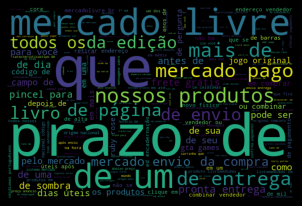

In [12]:
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

ac_words = ''

# reune todas as plalavras em um único objeto, veja.
for val in df.descricao:
  text = val.lower()
  for words in text:
    ac_words = ac_words + words
    # todas as palavras das descrições da categoria livro no mesmo objeto: livro_words. As palavras são inseridas letra por letra

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
livro_wordcloud = WordCloud(width=600, height=400).generate(ac_words)

# Word cloud da categoria Livro
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()